In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [117]:
posts_df = pd.read_csv('./Data/posts_scores_dates.csv')
posts_df

,id,title,created_utc,comments_old,score_old,post_time_utc,score,comments,percentile,viral
0,uu6g0w,[homemade] Polynesian (Chick-Fil-A sauce) chic...,1653077037,0,1,2022-05-20 16:03:57,69,7.0,0.836730,0
1,uu6cni,"[I ate] Scotch mutton pie, pub in Edinburgh",1653076799,0,1,2022-05-20 15:59:59,37,4.0,0.699491,0
2,uu6apo,[homemade] 🇲🇦,1653076639,0,1,2022-05-20 15:57:19,1,0.0,0.117647,0
3,uu644e,"[homemade] Chilli Paneer, Spinach, Potatoes wi...",1653076091,0,1,2022-05-20 15:48:11,16,2.0,0.443585,0
4,uu5x2y,"[Homemade] Tart - Salmon, spinach and goat cheese",1653075500,0,1,2022-05-20 15:38:20,1,0.0,0.117647,0
...,...,...,...,...,...,...,...,...,...,...
10790,u3jog2,[Homemade] Spinach fettuccine alfredo,1649948916,0,1,2022-04-14 11:08:36,13,0.0,0.387957,0
10791,u3jezk,[homemade] Glowup of instant noodles for me an...,1649948229,0,1,2022-04-14 10:57:09,15,2.0,0.424965,0
10792,u3jcej,[I ate] Napoleon cake and lemon curd tartlet.,1649948026,0,1,2022-04-14 10:53:46,14,1.0,0.405743,0
10793,u3j8ay,[Homemade] Tonkatsu bento box that I made for ...,1649947706,0,1,2022-04-14 10:48:26,30,5.0,0.636406,0


### Look at the distribution of scores

In [118]:
posts_df['score'].value_counts()

1        2183
15        212
14        203
16        190
17        186
         ... 
871         1
875         1
531         1
529         1
13240       1
Name: score, Length: 716, dtype: int64

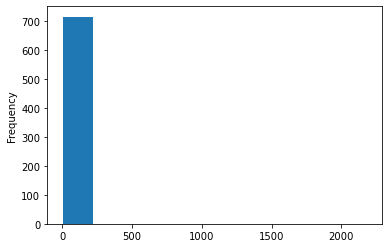

In [119]:
posts_df['score'].value_counts().plot(kind='hist');

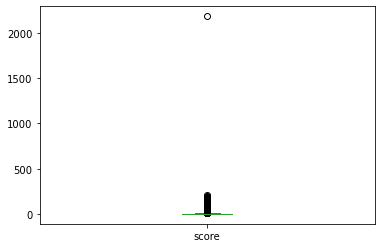

In [120]:
posts_df['score'].value_counts().plot(kind='box');

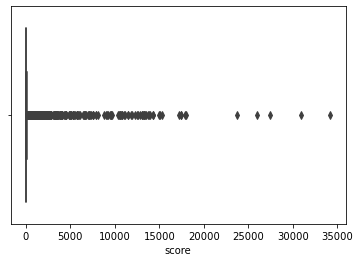

In [121]:
sns.boxplot(x= posts_df['score']);

<AxesSubplot:xlabel='score', ylabel='Count'>

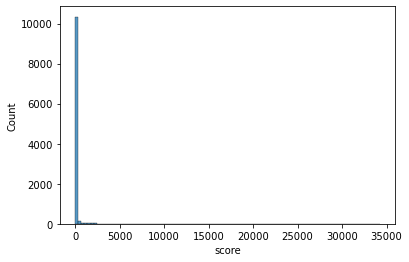

In [122]:
sns.histplot(x= posts_df['score'], bins = 100)

### Look at the distribution of num_comments

In [123]:
posts_df['comments'].value_counts()

0.0      2643
1.0      2008
2.0      1284
3.0       977
4.0       714
         ... 
108.0       1
122.0       1
281.0       1
175.0       1
226.0       1
Name: comments, Length: 181, dtype: int64

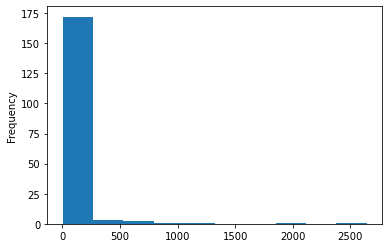

In [124]:
posts_df['comments'].value_counts().plot(kind='hist');

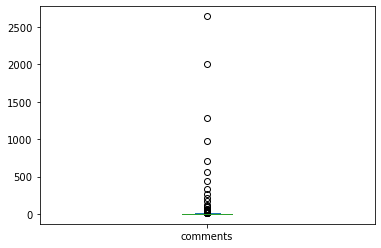

In [125]:
posts_df['comments'].value_counts().plot(kind='box');

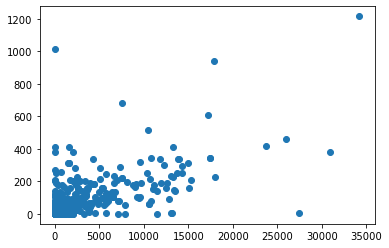

In [126]:
plt.scatter(posts_df['score'], posts_df['comments']);

In [127]:
posts_df['score'].corr(posts_df['comments'])

0.7075095079427783

the total score and number of comments are highly correlated

#### It is clear that there are some outliers, I will not drop the outliers since they are the poster children of 'viral'

In [128]:
posts_df['score'].mean()

161.3009726725336

In [129]:
posts_df['score'].median()

19.0

In [130]:
posts_df['score'].max()

34219

In [131]:
posts_df.sort_values(by='score', ascending=False).head(10)

,id,title,created_utc,comments_old,score_old,post_time_utc,score,comments,percentile,viral
112,utr520,[I ate] The Fries Box,1653042409,0,1,2022-05-20 06:26:49,34219,1216.0,1.000000,1
2549,umy385,[Homemade] M&amp;M Cookies,1652232268,1,1,2022-05-10 21:24:28,30934,380.0,0.999907,1
7719,ub3xng,[Homemade] Lowcountry Boil,1650833252,0,1,2022-04-24 16:47:32,27426,5.0,0.999815,1
8578,u8w6d7,[homemade] Cajun Bacon Fusilli.,1650571236,1,1,2022-04-21 16:00:36,25975,459.0,0.999722,1
10254,u4ze3j,[Homemade] French Fries,1650120610,1,1,2022-04-16 10:50:10,23742,416.0,0.999629,1
5788,ug219w,[HOMEMADE] Algerian Baklava,1651418197,0,1,2022-05-01 11:16:37,17958,229.0,0.999537,1
9789,u5qpf0,[I ate] A Connecticut Lobster Roll,1650213251,1,1,2022-04-17 12:34:11,17831,942.0,0.999444,1
4444,ujlmg1,"[i ate] Platter, green tea and blue lagoon.",1651837578,0,1,2022-05-06 07:46:18,17420,346.0,0.999352,1
4445,ujlmg1,"[i ate] Platter, green tea and blue lagoon.",1651837578,0,1,2022-05-06 07:46:18,17415,346.0,0.999259,1
6027,ufiz7h,[I ate] Lobster Roll and Poutine,1651349343,0,1,2022-04-30 16:09:03,17186,608.0,0.999166,1


In [132]:
posts_df.sort_values(by='score', ascending=True).head(10)

,id,title,created_utc,comments_old,score_old,post_time_utc,score,comments,percentile,viral
6709,udj7d1,[homemade] Cuisinart 360 Burgers!,1651108918,0,1,2022-04-27 21:21:58,0,2.0,0.008291,0
6299,ueqf6s,Raw Meat On Bread [Homemade],1651251635,0,1,2022-04-29 13:00:35,0,0.0,0.008291,0
6833,ude4kq,[i ate] Pop tarts,1651094160,0,1,2022-04-27 17:16:00,0,6.0,0.008291,0
2693,umir6d,[Homemade] Simple Sushi (more colorful),1652189374,1,1,2022-05-10 09:29:34,0,6.0,0.008291,0
2186,uo9oit,[I ate] The Mod's Hearts.,1652385656,1,1,2022-05-12 16:00:56,0,4.0,0.008291,0
6030,ufipc4,[i ate] fully loaded nachos,1651348523,0,1,2022-04-30 15:55:23,0,9.0,0.008291,0
6031,ufim9z,[I ate] Hot Cheetos burger and fries,1651348257,0,1,2022-04-30 15:50:57,0,2.0,0.008291,0
5838,ufz6y0,[homemade] Buffalo Chicken Wings,1651409308,0,0,2022-05-01 08:48:28,0,0.0,0.008291,0
6033,ufik7l,[I ate] Slice of pizza,1651348082,0,1,2022-04-30 15:48:02,0,1.0,0.008291,0
3814,uko02f,[I ate] bún (grilled beef/ bò nuong),1651962412,0,1,2022-05-07 18:26:52,0,16.0,0.008291,0


#### Baseline

In [133]:
posts_df['score'].value_counts(normalize=True)

1        0.202223
15       0.019639
14       0.018805
16       0.017601
17       0.017230
           ...   
871      0.000093
875      0.000093
531      0.000093
529      0.000093
13240    0.000093
Name: score, Length: 716, dtype: float64

If picking 1 as the score 100% of the time, the model would have an accuracy score of .2, any model should perform better than baseline.

if we condsider 'viral to be within the top 2% of posts' and treat this as a classification problem then the baseline accuracy is 98%

In [134]:
posts_df['viral'].value_counts(normalize=True)

0    0.979991
1    0.020009
Name: viral, dtype: float64

In [112]:
posts_df[posts_df['viral']==1].sort_values(by='score', ascending= False)

,id,title,created_utc,comments_old,score_old,post_time_utc,score,comments,percentile,viral
112,utr520,[I ate] The Fries Box,1653042409,0,1,2022-05-20 06:26:49,34219.0,1216.0,1.000000,1
13546,umy6ag,"[homemade] quiche- bacon, onion, spinach, tomato.",1652232540,1,1,2022-05-10 21:29:00,30931.0,380.0,0.999937,1
13548,umy6ag,"[homemade] quiche- bacon, onion, spinach, tomato.",1652232540,1,1,2022-05-10 21:29:00,30931.0,380.0,0.999937,1
13549,umy6ag,"[homemade] quiche- bacon, onion, spinach, tomato.",1652232540,1,1,2022-05-10 21:29:00,30929.0,380.0,0.999875,1
13547,umy6ag,"[homemade] quiche- bacon, onion, spinach, tomato.",1652232540,1,1,2022-05-10 21:29:00,30927.0,380.0,0.999833,1
...,...,...,...,...,...,...,...,...,...,...
12583,undd1m,[Homemade] Shrimp and Grits Pizza,1652285344,1,1,2022-05-11 12:09:04,1309.0,26.0,0.980162,1
12581,undd1m,[Homemade] Shrimp and Grits Pizza,1652285344,1,1,2022-05-11 12:09:04,1309.0,26.0,0.980162,1
12575,undng9,[Homemade] West Lake Beef Soup,1652286111,1,1,2022-05-11 12:21:51,1308.0,26.0,0.980078,1
12576,undng9,[Homemade] West Lake Beef Soup,1652286111,1,1,2022-05-11 12:21:51,1308.0,26.0,0.980078,1


In [135]:
posts_df[posts_df['viral']==1]['score'].max(), posts_df[posts_df['viral']==1]['score'].min()

(34219, 1209)

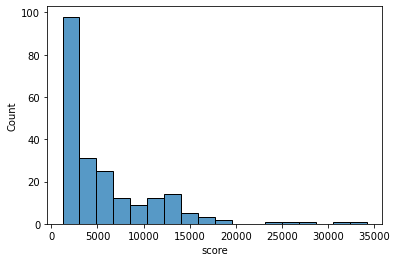

In [136]:
sns.histplot(posts_df[posts_df['viral']==1]['score']); #even within the top 5% of posts, there is still major skew